# **MODERN COMPUTER VISION** #
##### BY RAJEEV RATAN

<h2 style="margin-bottom:0;">🚀 Histogram Representations</h2>

<h5 style="margin-top:5px;">In this lesson we'll learn:</h5>

<p style="margin-top:0;">
1️⃣ View the RGB Histogram representations of images <br>
2️⃣ Use K-Means Clustering to get the dominant colours and their proportions in images <br>
</p>

In [2]:
# Our Setup, Import Libraries and Create our Imshow Function
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

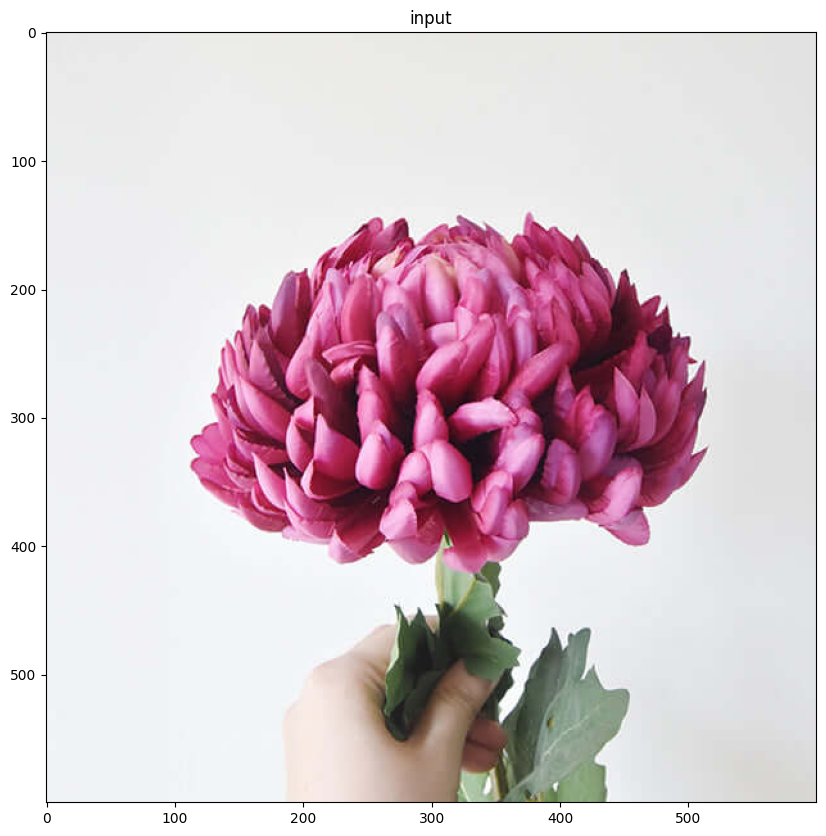

C:\Users\Robin\AppData\Local\Temp\ipykernel_16492\2461833418.py:7: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(image.ravel(), 256, [0, 256])


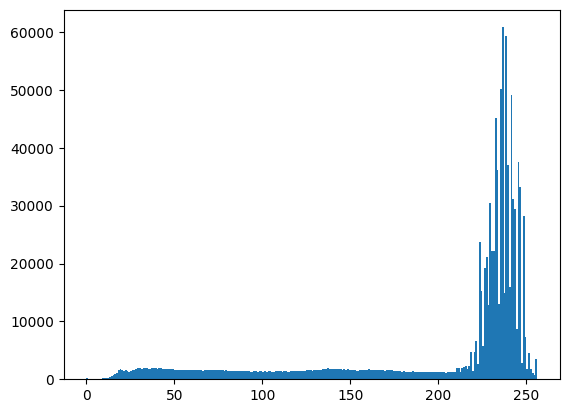

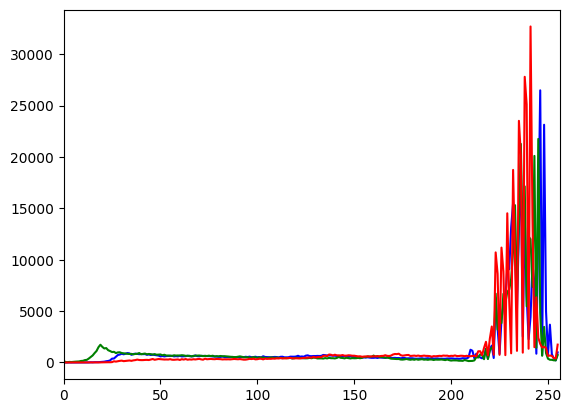

In [3]:
image = cv2.imread("../images/flowers.jpg")
imshow("input", image)

# histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# We plot a histogram, ravel() flattens our image array
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

# Viewing Separate Colour Channels
color = ('b', 'g', 'r')

# We now separate the colours and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0, 256])

plt.show()

#### **cv2.calcHist(images, channels, mask, histSize, ranges[, hist[accumulate]])** ####

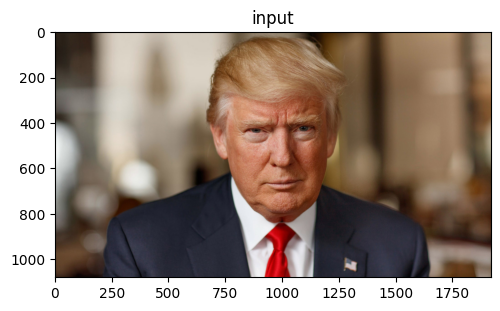

C:\Users\Robin\AppData\Local\Temp\ipykernel_12244\1701374447.py:7: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(image.ravel(), 256, [0, 256])


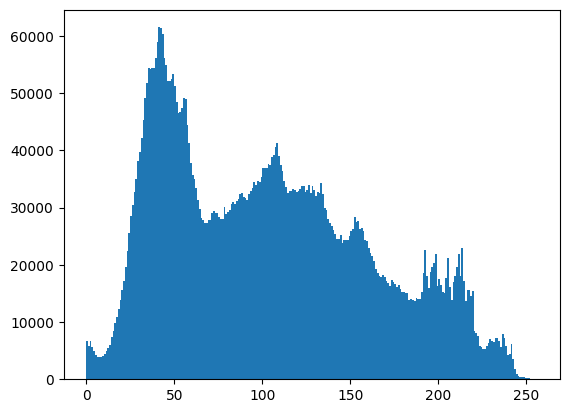

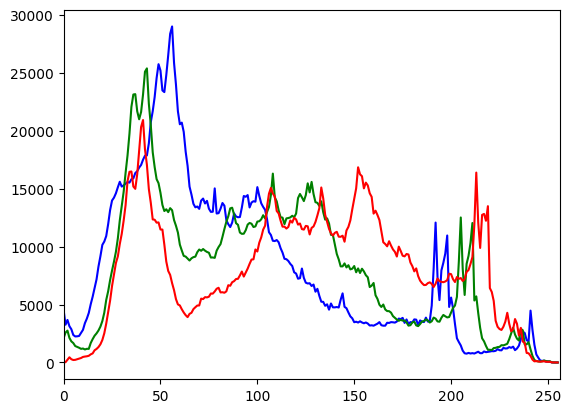

In [9]:
image = cv2.imread("../images/Trump.jpg")
imshow("input", image)

histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# We plot a histogram, ravel() flattens our image array
plt.hist(image.ravel(), 256, [0, 256])
plt.show()

# Viewing Separate Colour Channels
color = ('b', 'g', 'r')

# We now separate the colours and plot each in the Histogram
for i, col in enumerate(color):
    histogram2 = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(histogram2, color = col)
    plt.xlim([0, 256])

plt.show()

### **K-Means Clustering to obtain the dominant colours in an image** ###

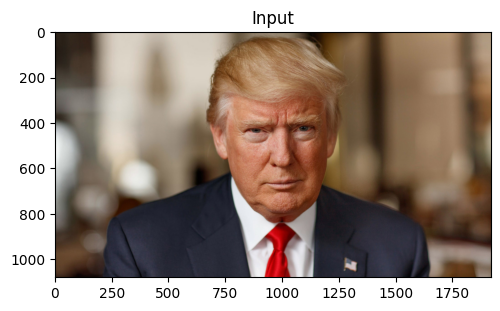

(1080, 1920, 3)
(2073600, 3)


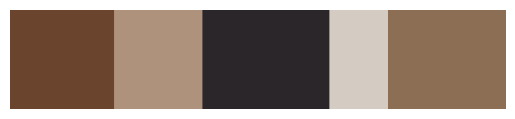

In [13]:
def centroidHistogram(clt):
    # Create a histogram for the clusters based on the pixels in each cluster
    # Get the labels for each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)

    # Create our histogram
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)

    # normalize the histogram, so that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()

    return hist

def plotColours(hist, centroids):
    # Create our blank barchart
    bar = np.zeros((100, 500, 3), dtype = "uint8")

    x_start = 0
    # iterate over the percentage and dominant colour of each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        end = x_start + (percent * 500)
        cv2.rectangle(bar, (int(x_start), 0), (int(end), 100),
            color.astype("uint8").tolist(), -1)
        x_start = end
    return bar

from sklearn.cluster import KMeans

image = cv2.imread("../images/Trump.jpg")
imshow("Input", image)

# We reshape our image into a list of RGB pixels
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)
image = image.reshape((image.shape[0] * image.shape[1], 3))
print(image.shape)

number_of_clusters = 5
clt = KMeans(number_of_clusters)
clt.fit(image)

hist = centroidHistogram(clt)
bar = plotColours(hist, clt.cluster_centers_)

# Show our colour part
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()

### **Let's try another image** ###

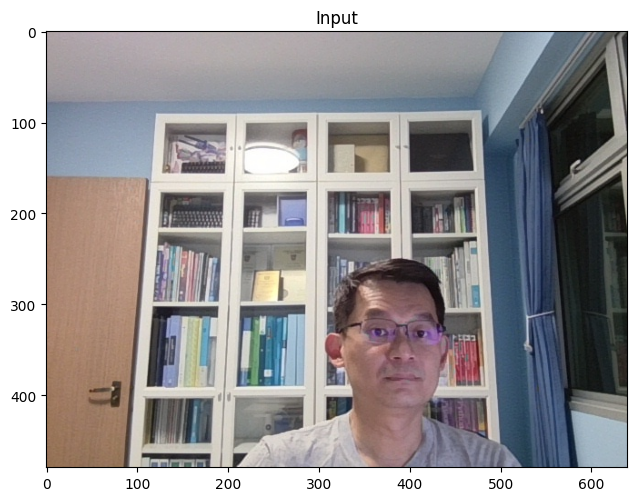

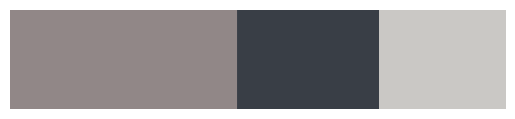

In [18]:
from sklearn.cluster import KMeans

image = cv2.imread("../images/photo.jpg")
imshow("Input", image)

# We reshape our image into a list of RGB pixels
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image.reshape((image.shape[0] * image.shape[1], 3))

number_of_clusters = 3
clt = KMeans(number_of_clusters)
clt.fit(image)

hist = centroidHistogram(clt)
bar = plotColours(hist, clt.cluster_centers_)

# Show our colour part
plt.figure()
plt.axis("off")
plt.imshow(bar)
plt.show()